# Capítulo 6 - Probabilidade

In [1]:
import enum, random, math
import matplotlib.pyplot as plt
from collections import Counter

random.seed(0)

## Probabilidade condicional

In [2]:
class Kid(enum.Enum):
    BOY = 0
    GIRL = 1

def random_kid() -> Kid:
    return random.choice([Kid.BOY, Kid.GIRL])

ambas_garotas = 0
garota_mais_velha = 0
alguma_garota = 0

for _ in range(10000):
    mais_novo = random_kid()
    mais_velho = random_kid()
    if mais_velho == Kid.GIRL:
        garota_mais_velha += 1
    if mais_velho == Kid.GIRL and mais_novo == Kid.GIRL:
        ambas_garotas += 1
    if mais_velho == Kid.GIRL or mais_novo == Kid.GIRL:
        alguma_garota += 1

print("P(ambos|mais velha):", ambas_garotas / garota_mais_velha)
print("P(ambos|alguma):", ambas_garotas / alguma_garota)

P(ambos|mais velha): 0.5007089325501317
P(ambos|alguma): 0.3311897106109325


## Distribuição contínua

In [3]:
def uniform_pdf(x: float) -> float:
    return 1 if 0 <= x < 1 else 0

def uniform_cdf(x: float) -> float:
    if x < 0: return 0
    elif x < 1: return x
    else: return 1

## Distribuição normal

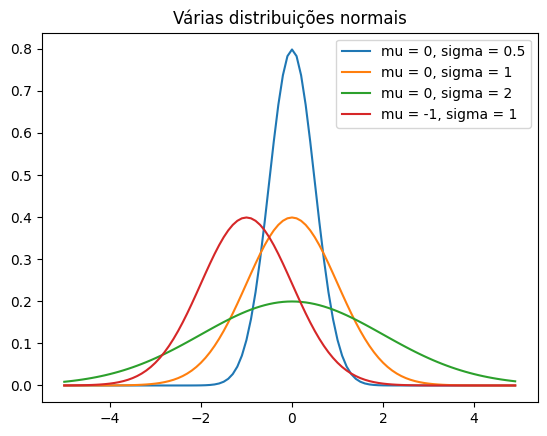

In [6]:
SQRT_TWO_PI = math.sqrt(2 * math.pi)

def normal_pdf(x: float, mu: float = 0, sigma: float = 1) -> float:
    return (math.exp(-(x-mu) ** 2 / 2 / sigma ** 2) / (SQRT_TWO_PI * sigma))

xs = [x / 10.0 for x in range(-50, 50)]

plt.plot(xs, [normal_pdf(x, sigma = 0.5) for x in xs], '-', label = 'mu = 0, sigma = 0.5')
plt.plot(xs, [normal_pdf(x, sigma = 1) for x in xs], '-', label = 'mu = 0, sigma = 1')
plt.plot(xs, [normal_pdf(x, sigma = 2) for x in xs], '-', label = 'mu = 0, sigma = 2')

plt.plot(xs, [normal_pdf(x, mu = -1, sigma = 1) for x in xs], '-', label = 'mu = -1, sigma = 1')
plt.legend()
plt.title("Várias distribuições normais")
plt.show()

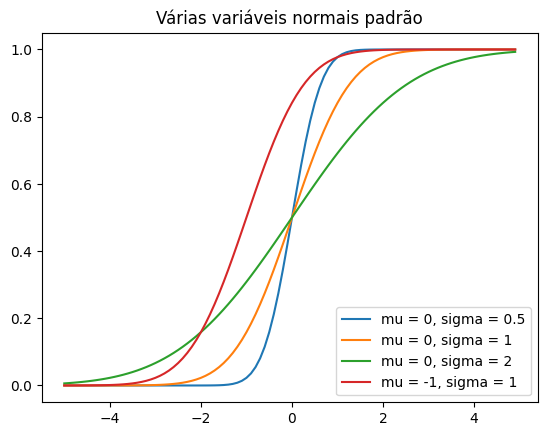

In [7]:
def normal_cdf(x: float, mu: float = 0, sigma: float = 1) -> float:
    return (1 + math.erf((x - mu) / math.sqrt(2) / sigma)) / 2

plt.plot(xs, [normal_cdf(x, sigma = 0.5) for x in xs], '-', label = 'mu = 0, sigma = 0.5')
plt.plot(xs, [normal_cdf(x, sigma = 1) for x in xs], '-', label = 'mu = 0, sigma = 1')
plt.plot(xs, [normal_cdf(x, sigma = 2) for x in xs], '-', label = 'mu = 0, sigma = 2')
plt.plot(xs, [normal_cdf(x, mu = -1) for x in xs], '-', label = 'mu = -1, sigma = 1')
plt.legend(loc = 4)
plt.title("Várias variáveis normais padrão")
plt.show()


In [8]:
def normal_inversa_cdf(p: float, mu: float = 0, sigma: float = 1, tolerancia: float = 0.00001) -> float:
    if mu != 0 or sigma != 1:
        return mu + sigma * normal_inversa_cdf(p, tolerancia = tolerancia)
    low_z = -10
    hi_z = 10
    while hi_z - low_z > tolerancia:
        mid_z = (low_z + hi_z) / 2
        mid_p = normal_cdf(mid_z)
        if mid_p < p:
            low_z = mid_z
        else:
            hi_z = mid_z
    return mid_z